### CASE STUDY 
Healthcare – Early Detection of Diabetes
Background:
A mobile health clinic wants to pre-screen patients for diabetes using basic health indicators to reduce hospital crowding and focus on at-risk individuals.
Problem Statement:

Use EDA to **uncover factors that greatly influence the risk of diabetes**. 
Develop a **classification model to predict if a person has diabetes based on attributes like BMI, glucose levels, insulin levels, and age.**


## Importing The necessary liabraries 

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings("ignore")

## Importing and reading the CSV data as  Pandas DataFrame 

In [18]:
#Displays the loaded DataFrame, showing the first few rows of the diabetes dataset.
data= pd.read_csv("diabetes.csv")
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [19]:
# checking the shape of the data
data.shape

(768, 9)

### The dataset contains 768 entries (rows) and 9 features (columns).


## Statistical Summary of the dataset 

In [20]:
# checking the statistical summary of the dataset like mean, std, min, max, etc for each column
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


The `data.describe()` function provides descriptive statistics for each numerical column in the dataset:

- **count**: Shows the number of non-missing values for each feature (should be 768 for all columns if there are no missing values).
- **mean**: The average value for each feature, giving a sense of the central tendency.
- **std**: The standard deviation, indicating how much the values vary from the mean.
- **min**: The smallest value in each column.
- **25% (Q1)**: The first quartile, meaning 25% of the data falls below this value.
- **50% (median)**: The median value, splitting the data into two equal halves.
- **75% (Q3)**: The third quartile, meaning 75% of the data falls below this value.
- **max**: The largest value in each column.

These statistics help identify the range, spread, and distribution of each feature, as well as potential outliers or unusual values. For example, a large difference between the mean and median may indicate skewness, and a high standard deviation suggests greater variability in that feature.

## checking the datatypes of the features 

In [21]:
#checking the data types of each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


The `data.info()` function displays the following information about the DataFrame:

- The total number of entries (rows) in the dataset.
- The names of all columns (features).
- The number of non-null (non-missing) values in each column.
- The data type of each column (e.g., int64, float64, object).
- The amount of memory used by the DataFrame.

This summary helps identify if there are any missing values, understand the structure of the dataset, and check the data types for each feature, which is important for further analysis and preprocessing.

## checking for missing values

In [22]:
# checking for null values in the dataset
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

The output of `data.isna().sum()` shows the number of missing (NaN) values in each column of the dataset. since all columns show 0, it means there are no missing values in the dataset. This confirms that the data is complete and ready for further analysis without the need for missing value imputation.

## checking for duplicated rows

In [23]:
# checking for duplicates in the dataset
data.duplicated().sum()

0

The output of `data.duplicated().sum()` shows the total number of duplicated rows in the dataset. Since the result is 0, it means there are no duplicate records, and all rows are unique. If the result is greater than 0, it indicates the presence of duplicate entries that may need to be addressed during data cleaning. in this case, there are no duplicated values in the dataset 

# exploring and getting insights from the dataset 

In [24]:
#creating  a variable for numerical  columns
numerical_cols = [col for col in data.columns if data[col].dtype in ['int64', 'float64']]
for col in numerical_cols:

    print(f"{col}-{data[col].nunique()} unique values")
    print(f"{col} has min: {data[col].min()}  max : {data[col].max()}  values")
    print(f"{col} has : {data[col].skew()} skewness")
    print(f"{col} has {data[col].mean()} as its mean")
    print(f"{col} has {data[col].std()} as its standard deviation")
    print("\n")

   

Pregnancies-17 unique values
Pregnancies has min: 0  max : 17  values
Pregnancies has : 0.9016739791518588 skewness
Pregnancies has 3.8450520833333335 as its mean
Pregnancies has 3.3695780626988623 as its standard deviation


Glucose-136 unique values
Glucose has min: 0  max : 199  values
Glucose has : 0.17375350179188992 skewness
Glucose has 120.89453125 as its mean
Glucose has 31.97261819513622 as its standard deviation


BloodPressure-47 unique values
BloodPressure has min: 0  max : 122  values
BloodPressure has : -1.8436079833551302 skewness
BloodPressure has 69.10546875 as its mean
BloodPressure has 19.355807170644777 as its standard deviation


SkinThickness-51 unique values
SkinThickness has min: 0  max : 99  values
SkinThickness has : 0.10937249648187608 skewness
SkinThickness has 20.536458333333332 as its mean
SkinThickness has 15.952217567727677 as its standard deviation


Insulin-186 unique values
Insulin has min: 0  max : 846  values
Insulin has : 2.272250858431574 skewness

## **Exploratve Data Analysis** (EDA)
### **Univariate Analysis**

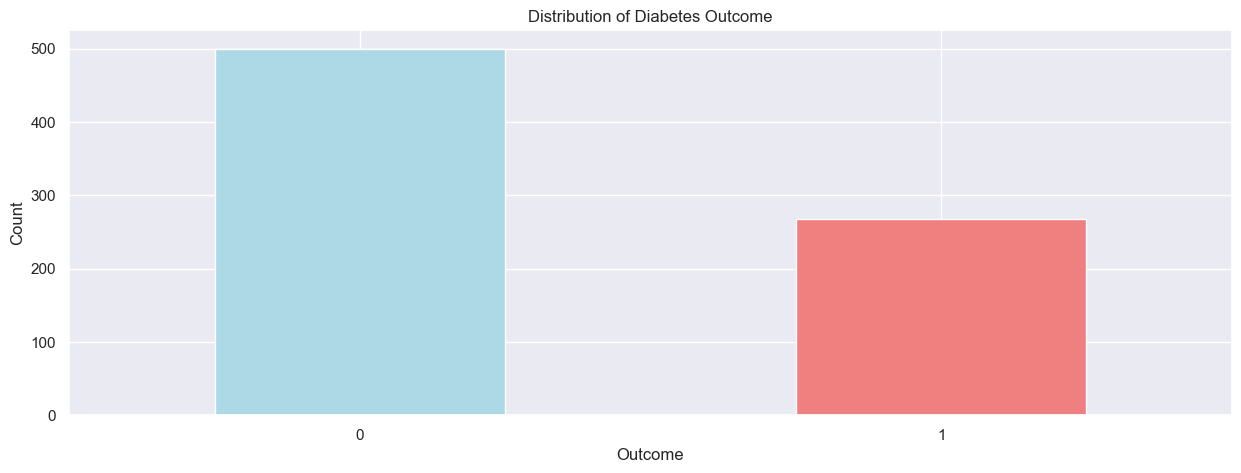

In [25]:
# Plotting the distribution of each numerical feature
plt.figure(figsize=(15, 5))
data['Outcome'].value_counts().plot(kind='bar', color=['lightblue', 'lightcoral'])
plt.title('Distribution of Diabetes Outcome')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


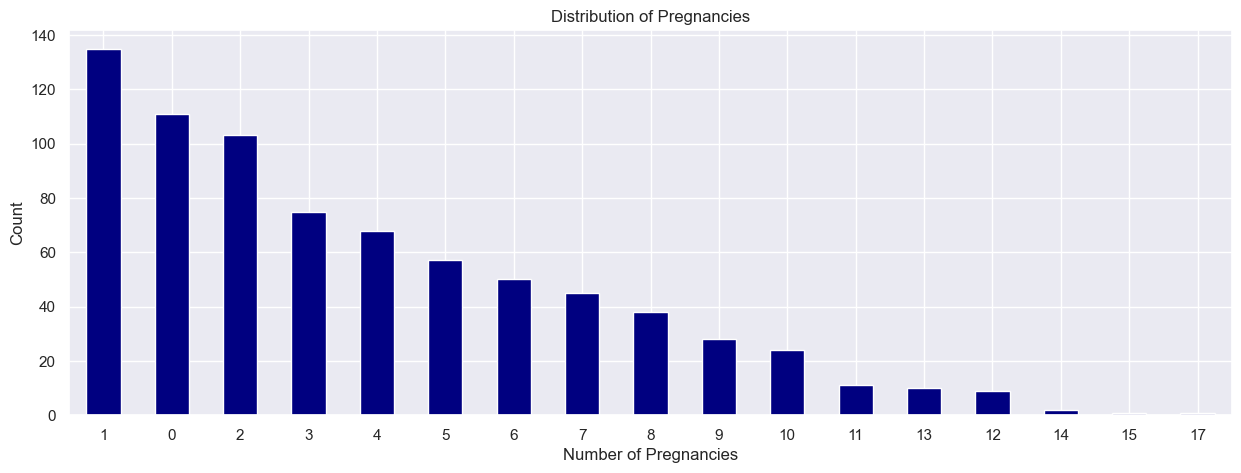

In [26]:
# Plotting the count of each unique value in the 'Pregnancies' column
plt.figure(figsize=(15, 5))
data['Pregnancies'].value_counts().plot(kind='bar', color='navy')
plt.title('Distribution of Pregnancies')
plt.xlabel('Number of Pregnancies')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


**Key Observations**:

**Most Common**: The most frequent number of pregnancies is 1, with over 130 individuals.

**Second Most Common**: 0 pregnancies is the second most common, with approximately 110-115 individuals.

**Decreasing Frequency**: As the number of pregnancies increases, the count of individuals generally decreases.
For example, there are roughly 100 individuals with 2 pregnancies, about 75 with 3, and around 68 with 4.

**Rare Occurrences**: Higher numbers of pregnancies (e.g., 10 or more) are much less frequent

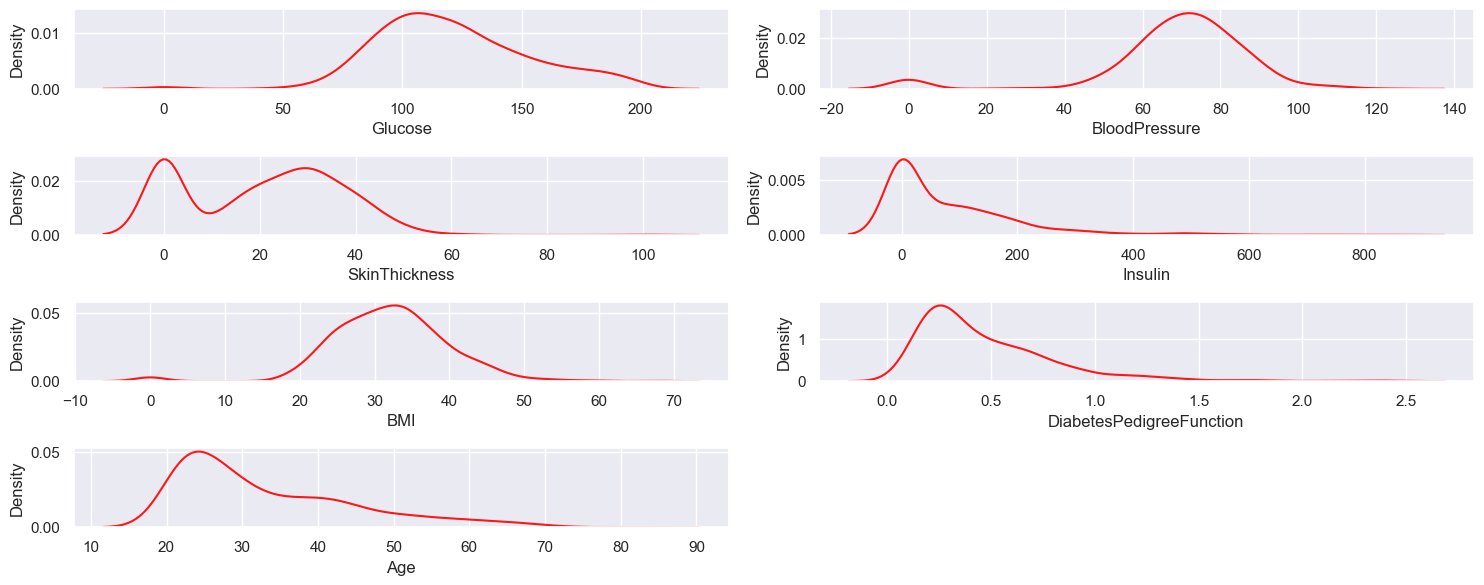

In [27]:
# Plotting the distribution of numerical features in the dataset
plt.figure(figsize=(15, 7))
for i, col in enumerate(['Glucose', 'BloodPressure', 'SkinThickness', 
                         'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']):
    plt.subplot(5, 2, i+1)
    sns.kdeplot(data[col], color='red', alpha=0.9)
    plt.xlabel(col)
    plt.tight_layout()

# Dataset Overview and Statistical Summary

This dataset contains **768 records** and **9 features** related to diabetes prediction. Below is a summary of each feature:

| Feature                    | Unique | Min   | Max   | Skewness  | Mean       | Std Dev    |
|----------------------------|--------|-------|-------|-----------|------------|------------|
| **Pregnancies**            | 17     | 0     | 17    | 0.902     | 3.85       | 3.37       |
| **Glucose**                | 136    | 0     | 199   | 0.174     | 120.89     | 31.97      |
| **BloodPressure**          | 47     | 0     | 122   | -1.844    | 69.11      | 19.36      |
| **SkinThickness**          | 51     | 0     | 99    | 0.109     | 20.54      | 15.95      |
| **Insulin**                | 186    | 0     | 846   | 2.272     | 79.80      | 115.24     |
| **BMI**                    | 248    | 0.0   | 67.1  | -0.429    | 31.99      | 7.88       |
| **DiabetesPedigreeFunction** | 517  | 0.078 | 2.42  | 1.920     | 0.472      | 0.331      |
| **Age**                    | 52     | 21    | 81    | 1.130     | 33.24      | 11.76      |
| **Outcome**                | 2      | 0     | 1     | 0.635     | 0.349      | 0.477      |

---

### Notes:

- A skewness near **0** indicates a **symmetric distribution**.
- A **positive skew** (> 0) means the right tail is longer; more low values.
- A **negative skew** (< 0) means the left tail is longer; more high values.

---


##  Insights:

- **Insulin** and **DiabetesPedigreeFunction** are **highly right-skewed**, suggesting potential need for transformation.
- **BloodPressure** is **left-skewed** with a skewness of -1.84.
- **Pregnancies**, **Age**, and **Outcome** are moderately **right-skewed**.
- Features like **Glucose**, **BloodPressure**, **SkinThickness**, **Insulin**, and **BMI** have a **minimum value of 0**, which may indicate **missing or imputed values** that need preprocessing.

---





### **Multivariate Analysis**

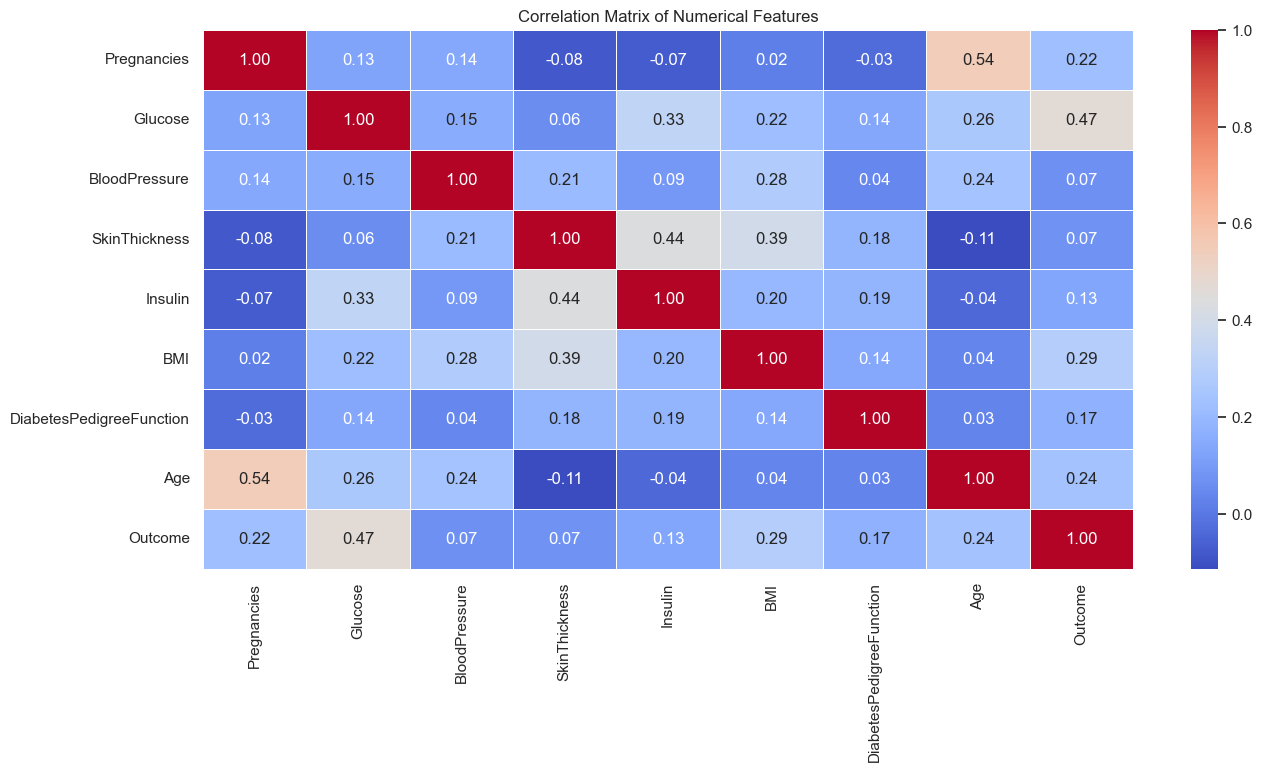

In [28]:
# corelation matrix to understand the relationship between numerical features
plt.figure(figsize=(15, 7))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
# Plotting the correlation matrix
plt.title('Correlation Matrix of Numerical Features')
plt.show()



**Key Observations**:

**Pregnancies and Age (0.54)**: There's a moderately positive correlation, suggesting that older individuals tend to have more pregnancies, or vice-versa.

**Outcome and Glucose (0.47)**: There's a moderate positive correlation, indicating that higher glucose levels are associated with a higher likelihood of the "Outcome" (which, in a diabetes context, usually implies a positive diabetes diagnosis).

**Outcome and BMI (0.29)**: There's a weak positive correlation between BMI and the "Outcome."

**SkinThickness and Insulin (0.44)**: A moderate positive correlation exists, suggesting that thicker skin folds might be associated with higher insulin levels.

P**regnancies and SkinThickness (-0.08)**: A very weak negative correlation, almost negligible.
BMI and SkinThickness (0.39): A moderate positive correlation, which is expected as skin thickness is a component of BMI calculation or related to body fat.

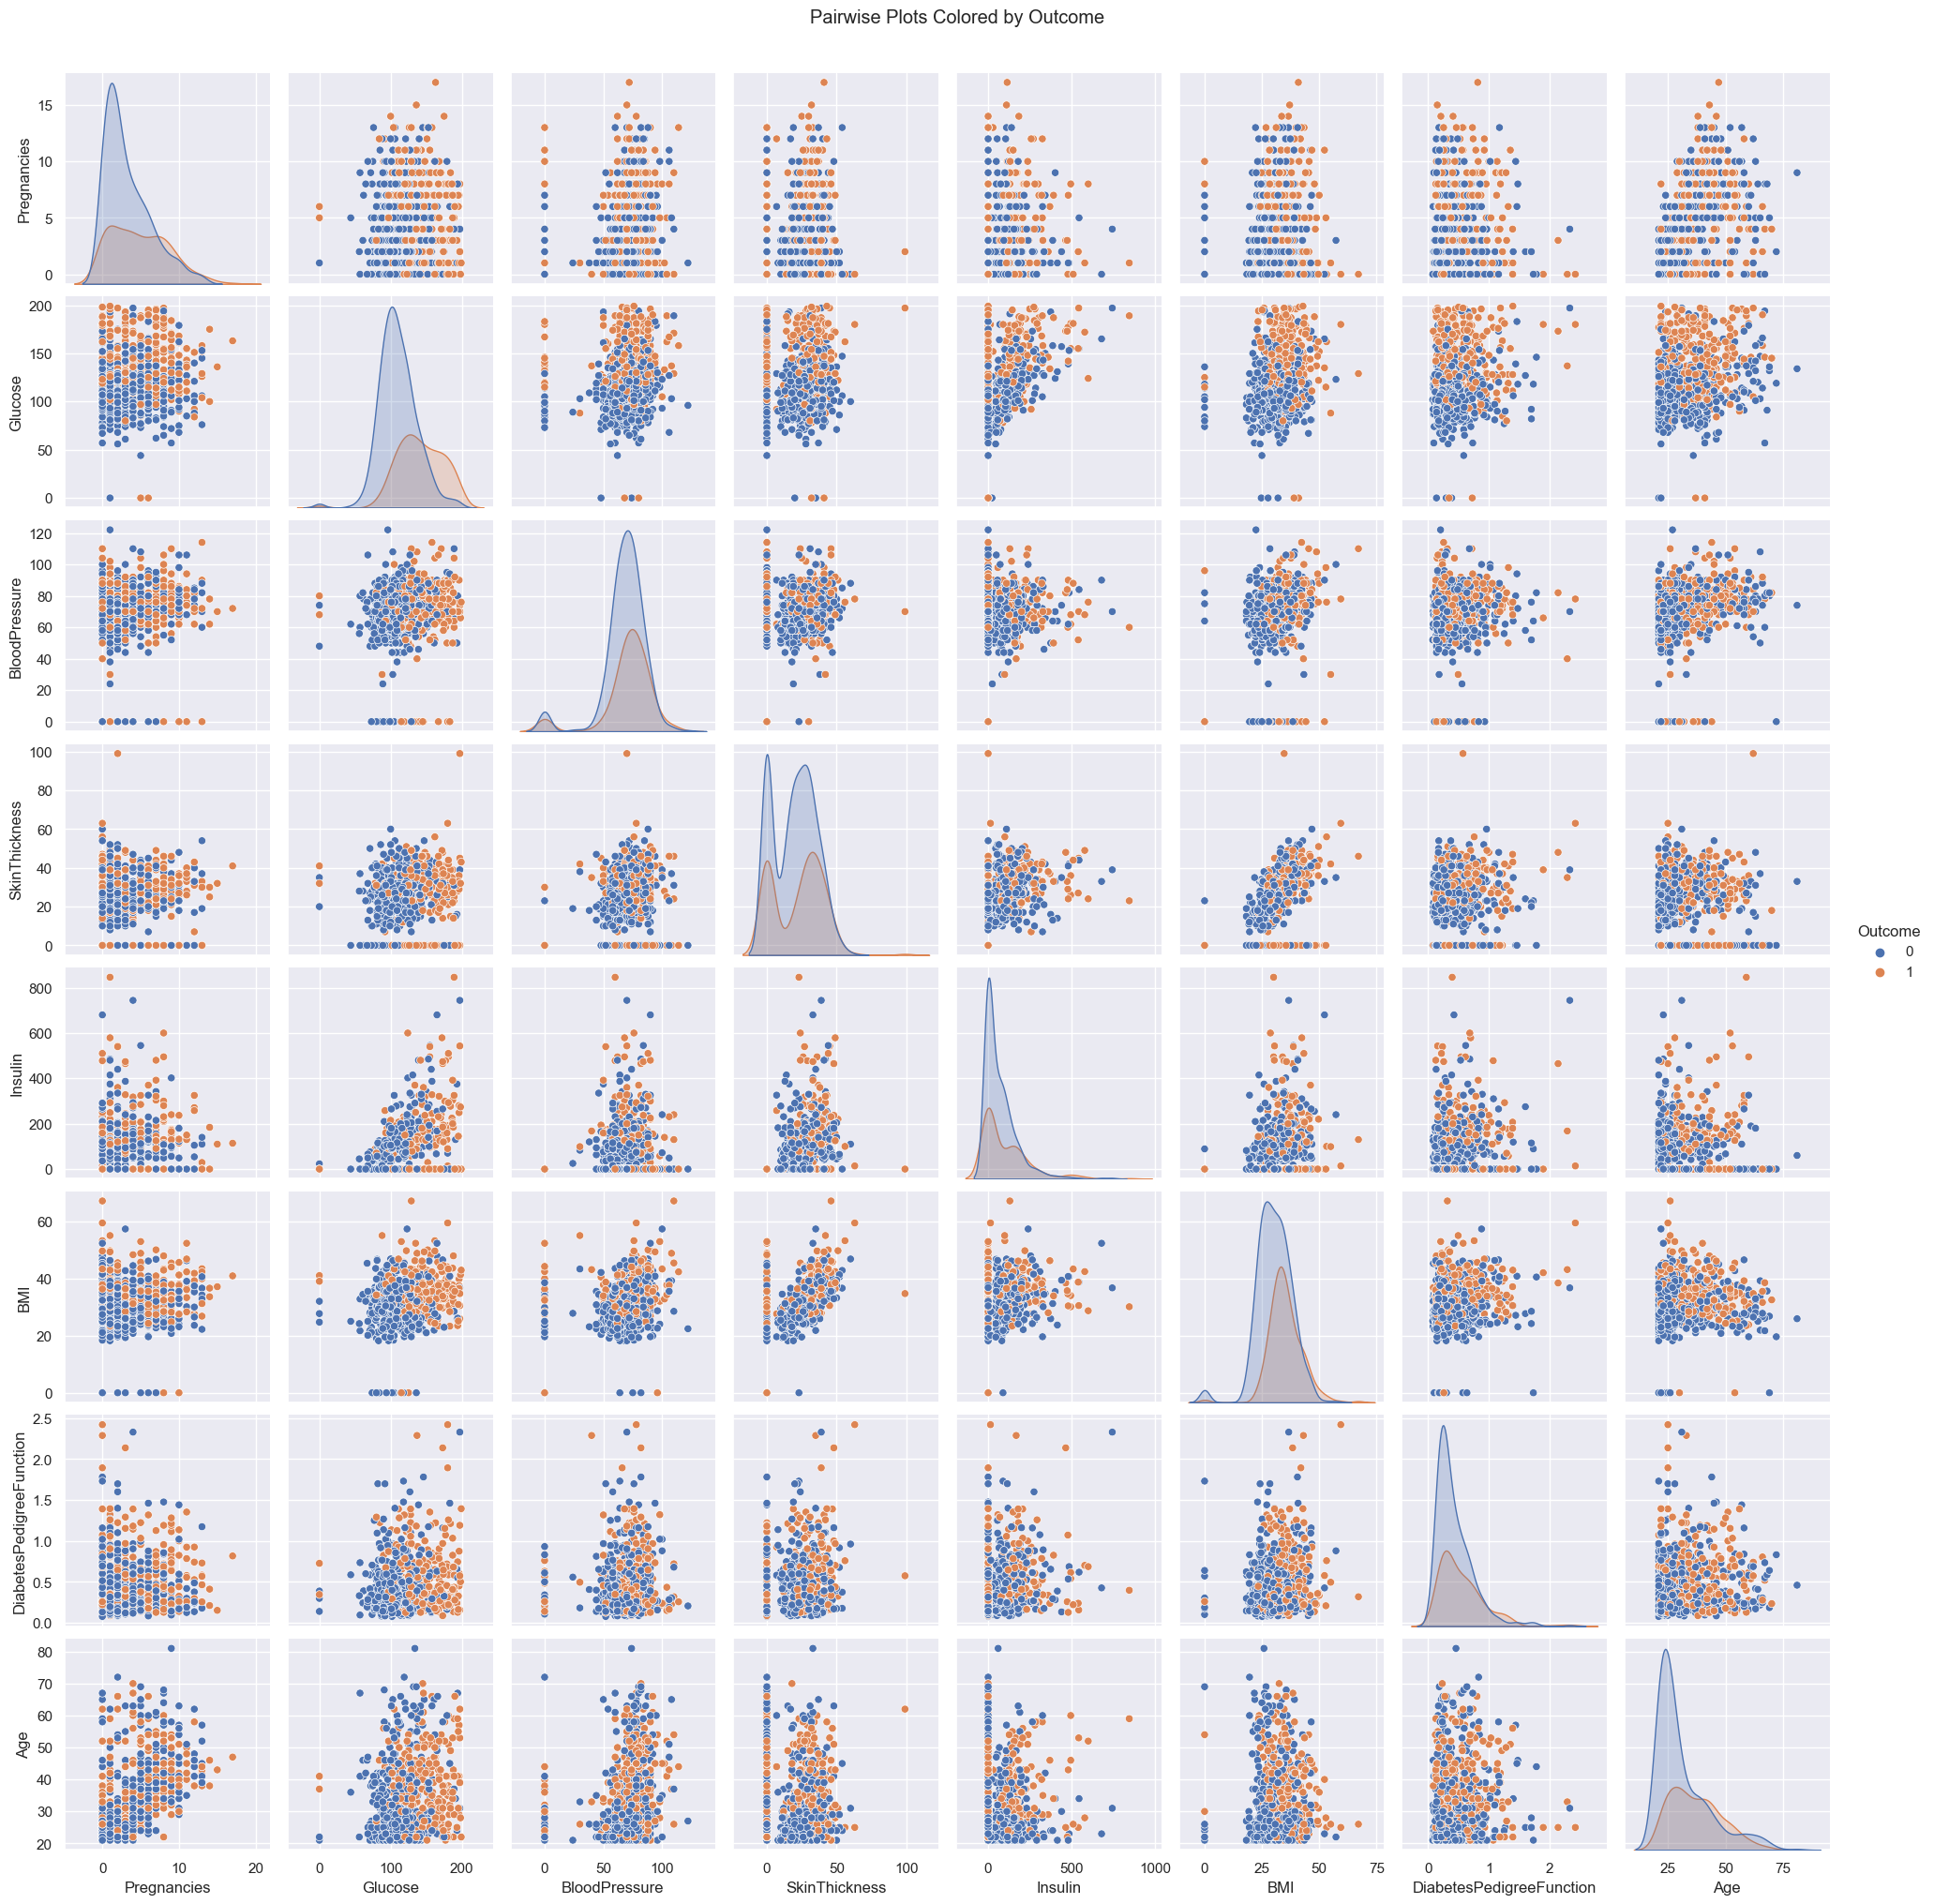

In [29]:
sns.pairplot(data, hue='Outcome', diag_kind='kde')
plt.suptitle("Pairwise Plots Colored by Outcome", y=1.02)
plt.show()


## Pairplot Interpretation: **Feature Relationships Colored by Outcome**
This pairplot visualizes pairwise relationships between all features in the dataset, with data points colored by Outcome (0 = No Diabetes, 1 = Diabetes).

Key Observations:
**Glucose** stands out as a strong differentiator: individuals with diabetes **(Outcome = 1)** tend to cluster at higher glucose values.

**Age vs. BMI and Age vs. Glucose** show a moderate trend: older individuals with higher BMI or glucose are more likely to be diabetic.

**Pregnancies and Age** show some linear correlation, especially among diabetics.

**Insulin and SkinThickness** have wide variability and no clear separation by outcome.

The density plots on the diagonal confirm that:

**Glucose, BMI, and Age** are **skewed higher** for diabetic individuals.

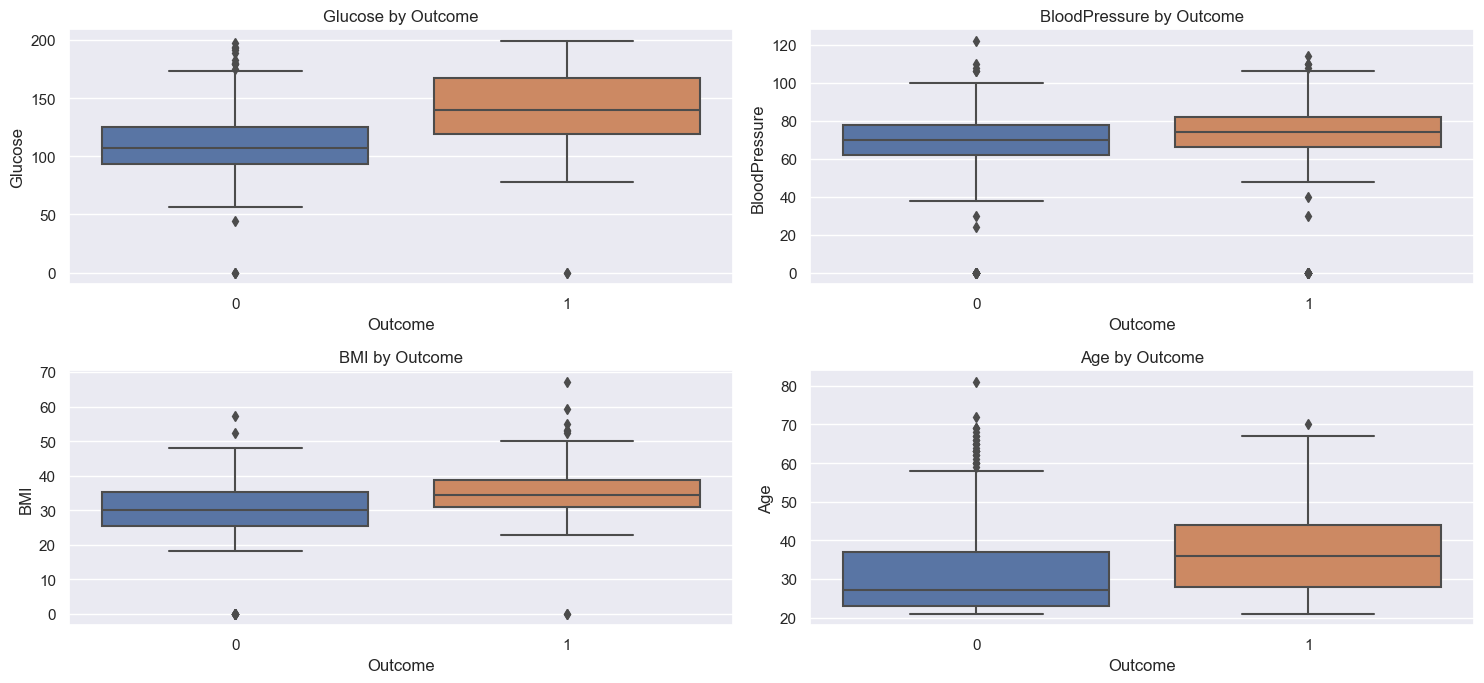

In [30]:
features = ['Glucose', 'BloodPressure', 'BMI', 'Age']

plt.figure(figsize=(15, 7))
for i, col in enumerate(features):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x='Outcome', y=col, data=data)
    plt.title(f'{col} by Outcome')

plt.tight_layout()
plt.show()


## Interpretation: **Feature Distributions by Outcome**
These box plots compare the distributions of Glucose, Blood Pressure, BMI, and Age between individuals with and without diabetes (Outcome = 1 or 0):

**Glucose**: Individuals with diabetes tend to have significantly higher glucose levels. This is the most visually distinct feature.

**Blood Pressure**: Diabetics show a slightly higher median, but with a large overlap in values compared to non-diabetics.

**BMI**: On average, diabetics have a slightly higher BMI than non-diabetics, though the distributions overlap.

**Age**: People with diabetes tend to be older, suggesting age may be a relevant risk factor.

### Feature Engineering for more insights

In [31]:
# function to calculate BMI and add it as a new column
def bmi_category(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 25:
        return 'Normal'
    elif 25 <= bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'

data['BMICategory'] = data['BMI'].apply(bmi_category)


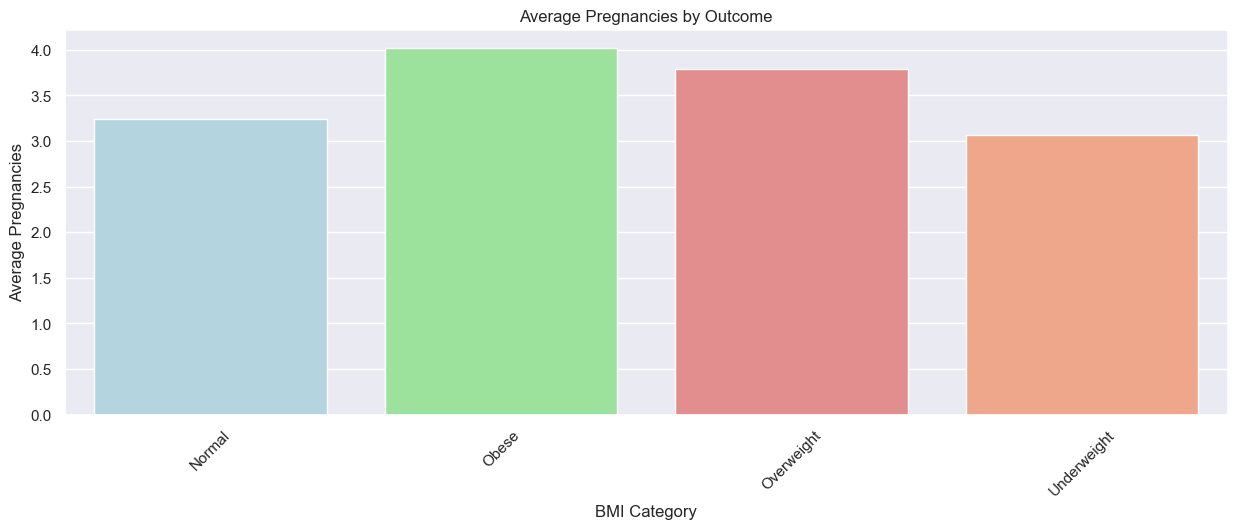

In [32]:
# Plotting the distribution of BMI categories by pregnancies

pregnancies_by_BMICategory = data.groupby('BMICategory')['Pregnancies'].mean().reset_index()
plt.figure(figsize=(15, 5))
sns.barplot(x='BMICategory', y='Pregnancies', data=pregnancies_by_BMICategory, palette =["lightblue", "lightgreen", "lightcoral", "lightsalmon"])
plt.title('Average Pregnancies by Outcome')
plt.xlabel('BMI Category')
plt.ylabel('Average Pregnancies')
plt.xticks(rotation=45)
plt.show()


Key Observations:

**Obese** individuals have the highest average number of **pregnancies**, close to 3.5. 

**Overweigh**t individuals have the second highest average number of pregnancies, slightly above 3.0.

**Normal weight** individuals have an average of about 2.5 pregnancies.

**Underweight** individuals have the lowest average number of pregnancies, approximately 1.0.

In summary, the graph suggests a trend where individuals classified as **Obese or Overweight** tend to have a **higher average number of pregnancies** compared to those with Normal or **Underweight BMIs**.

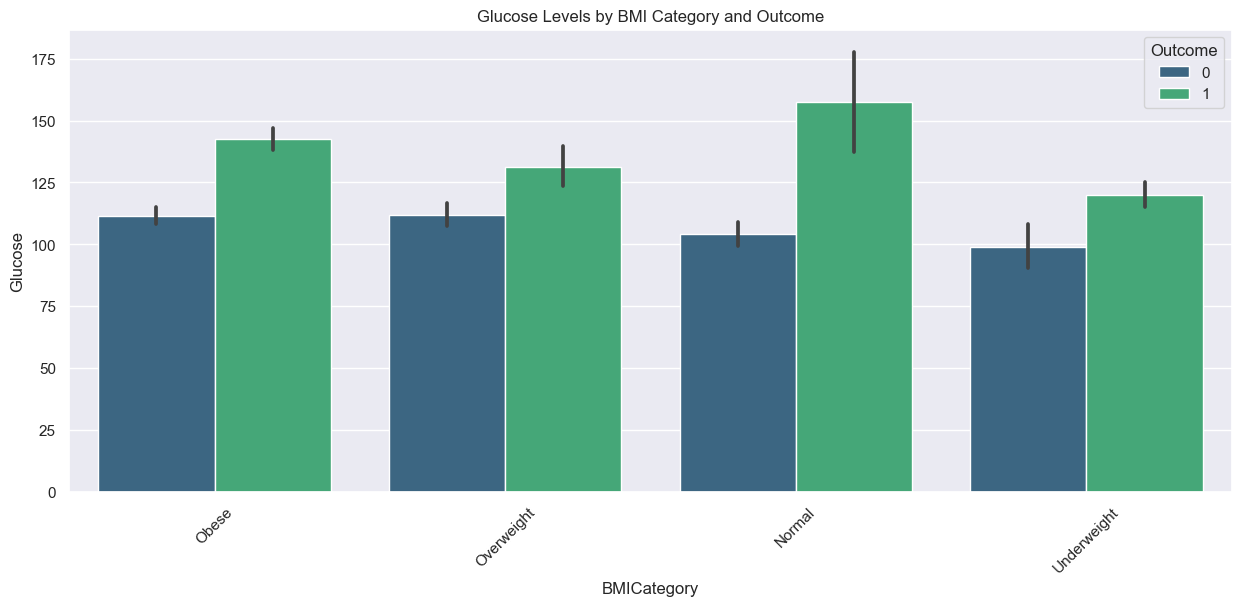

In [33]:
# Plotting the average glucose levels by BMI category and outcome"
plt.figure(figsize=(15, 6))
sns.barplot(x='BMICategory', y='Glucose', hue='Outcome', data=data, palette='viridis')
plt.title('Glucose Levels by BMI Category and Outcome')
plt.xticks(rotation=45)
plt.show()


 This bar chart displays average glucose levels, categorized by BMI and an **"Outcome"** variable (0 or 1). Individuals with **"Outcome 1"** consistently show higher glucose levels across **"Overweight," "Obese," and "Normal"** BMI categories, indicating a strong association between **"Outcome 1"** and elevated glucose. "Underweight" only shows **"Outcome 0"** with low glucose.





 ## General insight :
 Based on this exploratory data analysis,** Glucose levels** stand out as the** most influential factor** greatly impacting the **risk of diabetes**. **BMI and Age** also show significant, albeit lesser, influence. Other factors like **Pregnancies, BloodPressure, DiabetesPedigreeFunction, SkinThickness, and Insulin** appear to have a weaker direct linear relationship with the **'Outcome'** (diabetes risk) in this dataset.

## Data Preprocessing for model building 
### Removing rows where any of the specified columns are zero (since zero is likely invalid for these features)


In [34]:
#Removing rows where any of the specified columns are zero (since zero is likely invalid for these features)
unc = data[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]]
data = data[(unc != 0).all(axis=1)]

#Prints out any columns that still have zero values and how many.
for col in data.columns:
    zc = data[col] == 0
    if zc.sum() > 0:
        print(f"{col} has {zc.sum()} zero values")
data.shape

Pregnancies has 56 zero values
Outcome has 262 zero values


(392, 10)

In [35]:
#let split the data into features (x) and target (y)
x = data.drop(["Outcome","BMICategory"], axis=1)
y = data["Outcome"]

Pregnancies                 1.335596
Glucose                     0.517850
BloodPressure              -0.087516
SkinThickness               0.209311
Insulin                     2.165116
BMI                         0.663485
DiabetesPedigreeFunction    1.959101
Age                         1.403607
dtype: float64

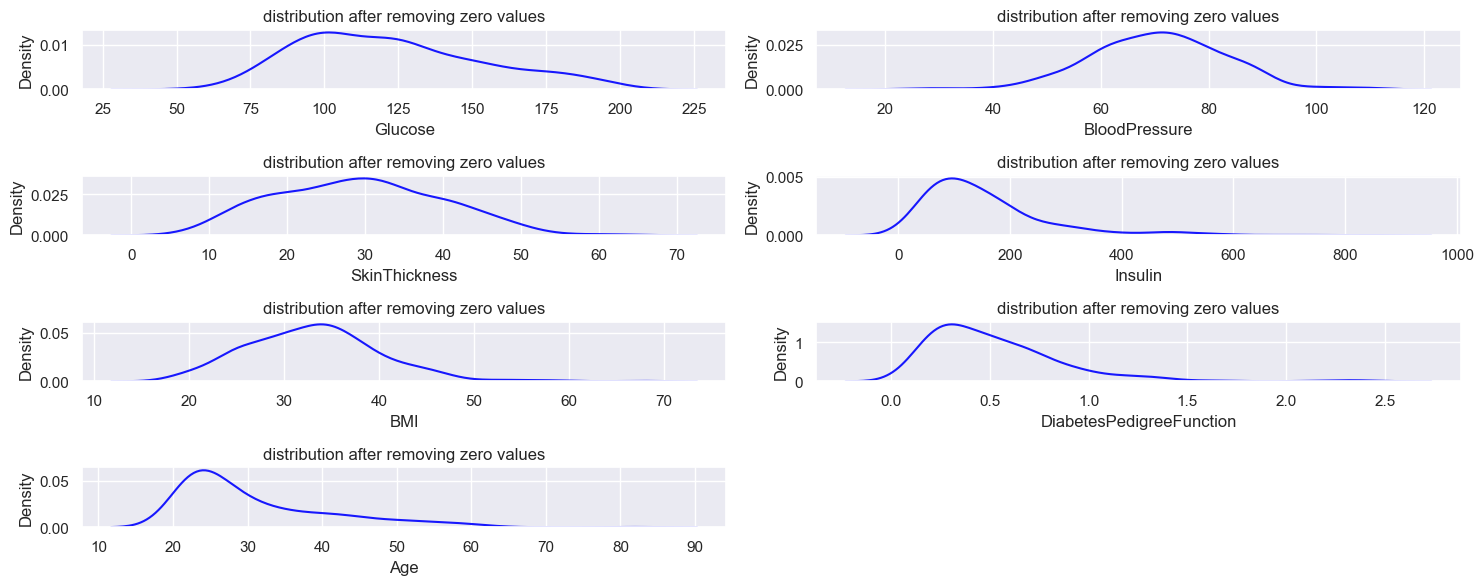

In [36]:
# A kernel density plots for each feature, visualizing their distributions after removing rows with zero values.
plt.figure(figsize=(15, 7))
for i, col in enumerate(['Glucose', 'BloodPressure', 'SkinThickness', 
                         'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']):
    plt.subplot(5, 2, i+1)
    sns.kdeplot(x=x[col], color='blue', alpha=0.9)
    plt.title("distribution after removing zero values")
    plt.xlabel(col)
    plt.tight_layout()

#checking the skewness value for each feature, indicating how much the distribution deviates from normal.
x.skew()

| Feature                      | Distribution Shape  | Skewness Observation   | Insight/Note                                                             |
| ---------------------------- | ------------------- | ---------------------- | ------------------------------------------------------------------------ |
| **Glucose**                  | Slight right skew   | Mild positive skew     | Fairly normal; no urgent transformation needed unless required by model. |
| **BloodPressure**            | Right skew          | Positive skew          | Might benefit from log or square root transformation.                    |
| **SkinThickness**            | Nearly symmetric    | Slightly skewed        | Close to normal distribution.                                            |
| **Insulin**                  | Highly right skewed | Strong positive skew   | Apply log or Box-Cox/Yeo-Johnson transformation to normalize.            |
| **BMI**                      | Slight right skew   | Mild positive skew     | Possibly okay, but transformation may help in linear models.             |
| **DiabetesPedigreeFunction** | Right skew          | Strong positive skew   | Log or Yeo-Johnson transformation recommended.                           |
| **Age**                      | Right skewed        | Moderate positive skew | Consider transformation depending on model used.                         |


### Testing **power transformer** on some highly skewed fearures 

In [37]:
#Using PowerTransformer to apply a Yeo-Johnson transformation to the specified features.

from sklearn.preprocessing import PowerTransformer,StandardScaler
pt = PowerTransformer(method='yeo-johnson')
transform_features = ['Insulin', 'DiabetesPedigreeFunction', 'Age']
x_copy = pt.fit_transform(x[transform_features])

#making a dataframe of the x_copy with the transformed features.
x_copy = pd.DataFrame(x_copy, columns=transform_features)

Insulin                     0.001513
DiabetesPedigreeFunction    0.080712
Age                         0.214510
dtype: float64


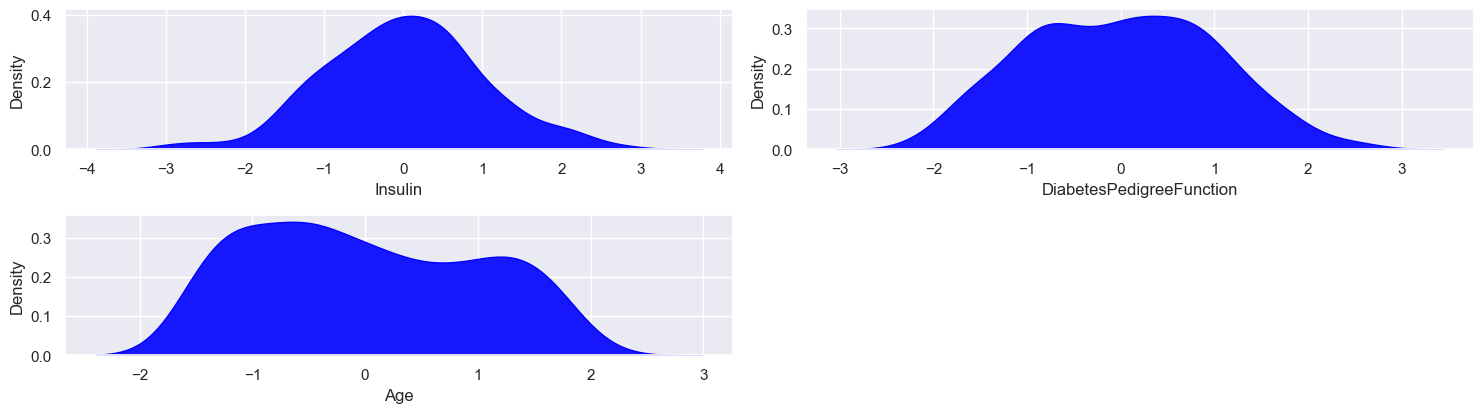

In [38]:
#checking skewness of the transformed features to see if the transformation was effective.
print(x_copy.skew())

#Plotting the transformed features to visualize their distributions after transformation.
plt.figure(figsize=(15, 10))
for i, col in enumerate(x_copy):
    plt.subplot(5, 2, i+1)
    sns.kdeplot(x=x_copy[col], color='blue',fill=True, alpha=0.9)
    plt.xlabel(col)
    plt.tight_layout()

### The **Power Transformer** has effectively reduced skewness and brought the distributions of **Insulin**, **DiabetesPedigreeFunction**, and **Age** closer to a normal distribution.
### We will proceed to apply it on the dependant features (**x**)

In [39]:
#Applying the PowerTransformer to all features in the x set and scaling them using StandardScaler through a pipeline.

from sklearn.pipeline import Pipeline
pipeline = Pipeline([
    ("power", PowerTransformer(method='yeo-johnson')),
    ("scaler", StandardScaler())
])
x= pipeline.fit_transform(x)

#Converting the transformed features back into a DataFrame with the original column names.
x = pd.DataFrame(x, columns=data.columns[:-2])  
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-0.679722,-1.163269,-0.389294,-0.538382,-0.402541,-0.677637,-1.477242,-1.481170
1,-1.639676,0.574434,-2.372525,0.593776,0.436887,1.371217,2.484524,0.634297
2,0.266180,-1.703899,-1.630983,0.324459,-0.496577,-0.218606,-0.950749,-0.285265
3,-0.124712,2.001230,-0.069687,1.441888,2.192231,-0.295072,-1.542083,1.658737
4,-0.679722,1.840088,-0.862120,-0.538382,2.875572,-0.357016,-0.190345,1.796740
...,...,...,...,...,...,...,...,...
387,-1.639676,1.671507,1.407671,1.360075,2.096478,1.394097,-1.109281,-0.285265
388,-0.679722,0.303783,1.407671,0.941451,-0.177338,0.559787,1.505623,0.961161
389,-0.124712,-1.209409,-1.017881,-0.240333,-2.813755,-0.628334,0.969109,-1.183845
390,1.621866,-0.648924,0.415907,1.683832,0.537961,0.062719,-1.448864,1.869485


Pregnancies                 0.004328
Glucose                     0.003667
BloodPressure               0.051875
SkinThickness              -0.053678
Insulin                     0.001513
BMI                         0.001598
DiabetesPedigreeFunction    0.080712
Age                         0.214510
dtype: float64

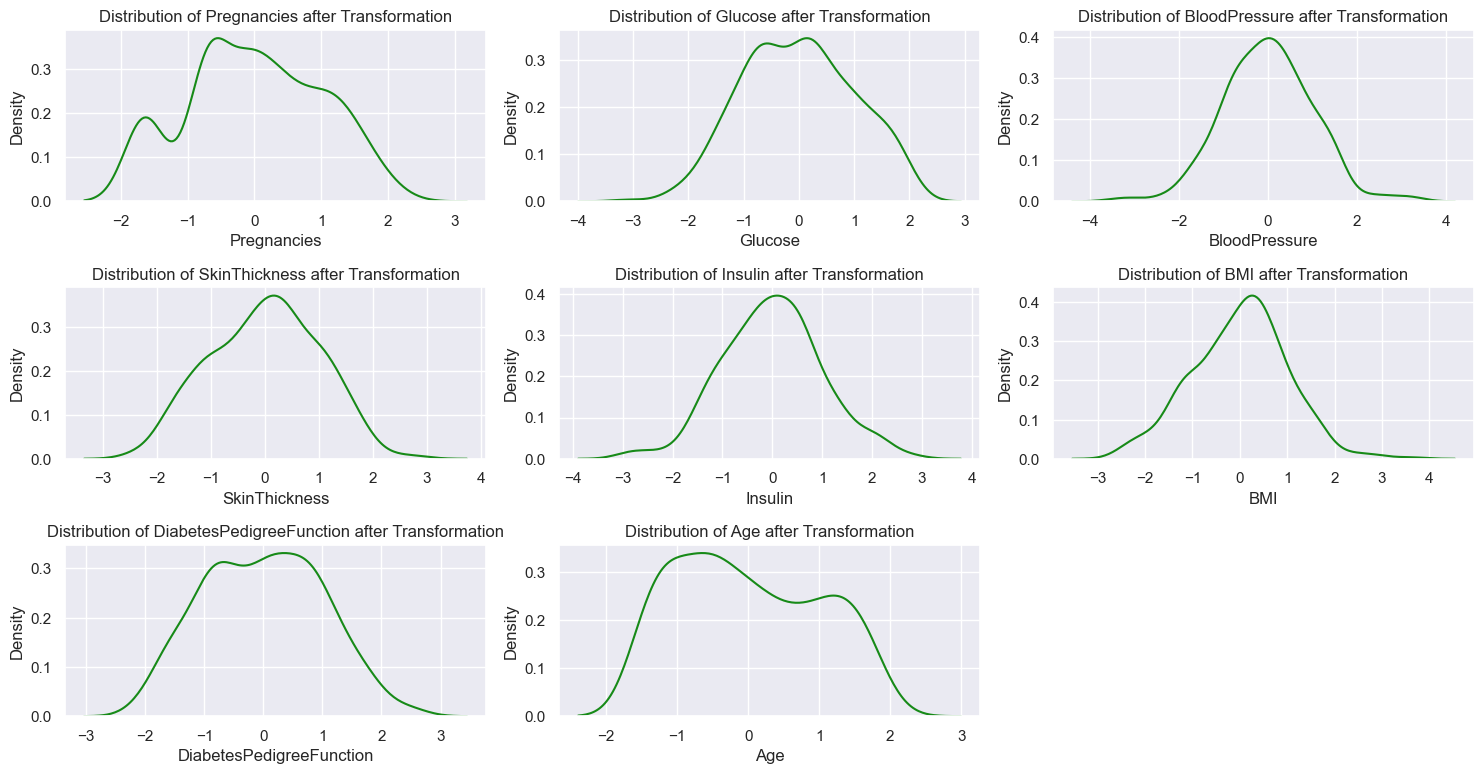

In [40]:
#Plotting the kernel density estimates for each feature after transformation to visualize their distributions.
plt.figure(figsize=(15, 10))
for i,col in enumerate(x.columns):
    plt.subplot(4, 3, i+1)
    sns.kdeplot(x=x[col], color='green', alpha=0.9)
    plt.title(f"Distribution of {col} after Transformation")
    plt.ylabel("Density")
    plt.xlabel(col)
    plt.tight_layout()

x.skew()

### x values are now  fairly skewed after applying **power transformer** compared to ealier state 

## Checking the distribution of the target variable (**Outcome**) to understand the balance between classes.

Outcome
0    262
1    130
Name: count, dtype: int64


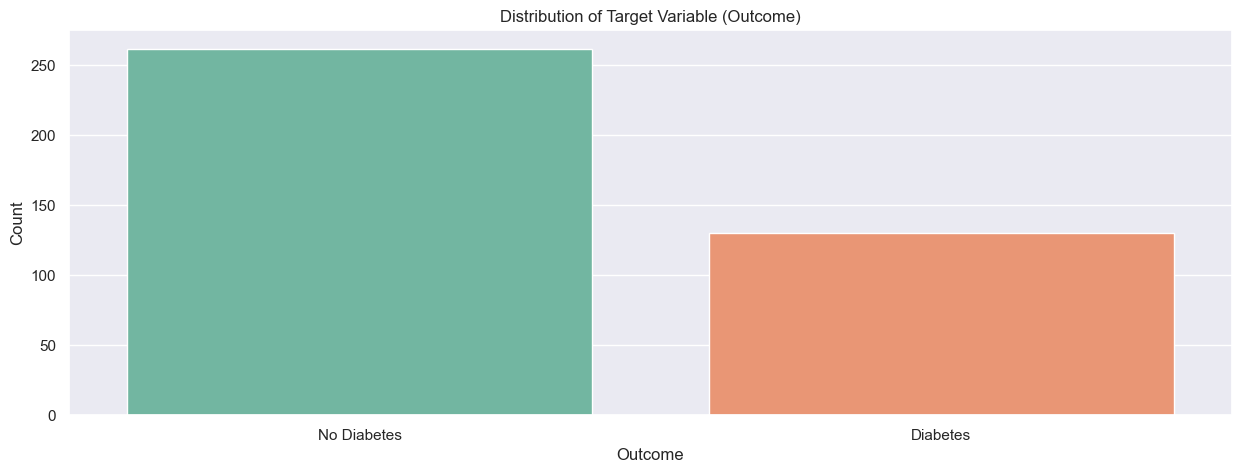

In [41]:
y_count = y.value_counts()
print(y_count)

# Plotting the distribution of the target variable (Outcome) using a pie chart.
plt.figure(figsize=(15, 5))
sns.countplot(x=y, palette='Set2')
plt.title("Distribution of Target Variable (Outcome)")
plt.xlabel("Outcome")
plt.ylabel("Count")
plt.xticks(ticks=[0, 1], labels=['No Diabetes', 'Diabetes'])
plt.show()



distribution of the target variable "**Outcome**," which represents whether an individual has diabetes or not.

- **No Diabetes**: ~260 instances
- **Diabetes**: ~130 instances

there will be the need to work on the imbalancing in the target variable 

## Using smoteenn to balance the dataset

In [42]:
#resampling the data to address class imbalance using SMOTEENN (Synthetic Minority Over-sampling Technique with Edited Nearest Neighbors).
from imblearn.combine import SMOTETomek, SMOTEENN
smote = SMOTEENN(random_state=42, sampling_strategy='auto')


# Resampling the features (x) and target (y) using SMOTEENN to balance the classes.
x_resampled, y_resampled = smote.fit_resample(x, y)
x_resampled.shape,y_resampled.shape

((332, 8), (332,))

In [43]:
# splitting the resampled data into training and testing sets, with 20% of the data reserved for testing.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.2, random_state=42)
print(f"Training set shape: {x_train.shape}, {y_train.shape}")

Training set shape: (265, 8), (265,)


In [44]:
# Fitting a Logistic Regression model to the training data.
from sklearn.linear_model import LogisticRegression
lg_model = LogisticRegression()
lg_model.fit(x_train, y_train)



LogisticRegression()

In [45]:
# Predicting the target variable on the test set using the trained model.
y_pred = lg_model.predict(x_test)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9104477611940298
[[27  6]
 [ 0 34]]
              precision    recall  f1-score   support

           0       1.00      0.82      0.90        33
           1       0.85      1.00      0.92        34

    accuracy                           0.91        67
   macro avg       0.93      0.91      0.91        67
weighted avg       0.92      0.91      0.91        67



In [46]:
# Fitting a Random Forest Classifier to the training data and evaluating its performance.

from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(x_train, y_train)


RandomForestClassifier(random_state=42)

In [47]:
y_pred_rf = rf_model.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


Accuracy: 0.9552238805970149
Confusion Matrix:
 [[30  3]
 [ 0 34]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.91      0.95        33
           1       0.92      1.00      0.96        34

    accuracy                           0.96        67
   macro avg       0.96      0.95      0.96        67
weighted avg       0.96      0.96      0.96        67



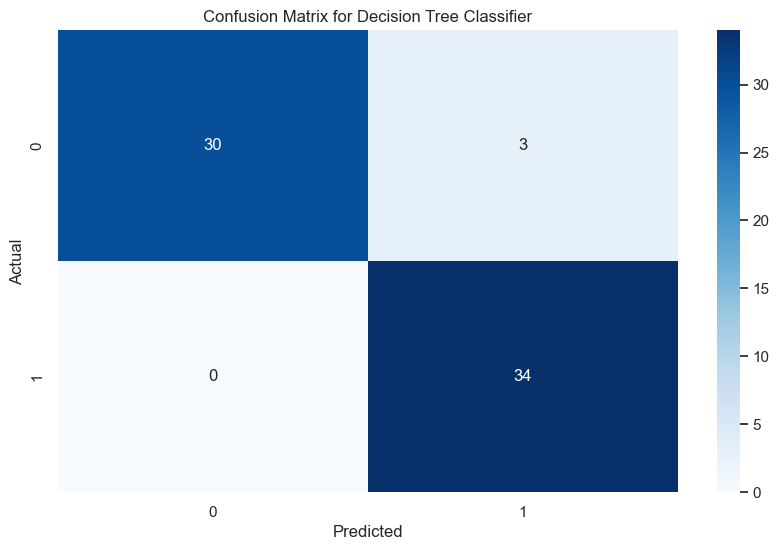

In [48]:
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix for Decision Tree Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [49]:
# Fitting a Decision Tree Classifier to the training data and evaluating its performance.
from sklearn.tree import DecisionTreeClassifier
dc_model = DecisionTreeClassifier(random_state=42)
dc_model.fit(x_train, y_train)
y_pred_dc = dc_model.predict(x_test)
print("accuracy score",accuracy_score(y_test, y_pred_dc))
print("confusion Metrix",confusion_matrix(y_test, y_pred_dc))
print("classification report",classification_report(y_test, y_pred_dc))

accuracy score 0.9402985074626866
confusion Metrix [[30  3]
 [ 1 33]]
classification report               precision    recall  f1-score   support

           0       0.97      0.91      0.94        33
           1       0.92      0.97      0.94        34

    accuracy                           0.94        67
   macro avg       0.94      0.94      0.94        67
weighted avg       0.94      0.94      0.94        67



In [50]:
from sklearn.svm import SVC

svm = SVC(class_weight='balanced', probability=True, random_state=42)
svm.fit(x_train, y_train)
y_pred = svm.predict(x_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print( classification_report(y_test, y_pred))

0.9552238805970149
[[30  3]
 [ 0 34]]
              precision    recall  f1-score   support

           0       1.00      0.91      0.95        33
           1       0.92      1.00      0.96        34

    accuracy                           0.96        67
   macro avg       0.96      0.95      0.96        67
weighted avg       0.96      0.96      0.96        67



In [51]:
from sklearn.svm import SVC

svm = SVC(class_weight='balanced', probability=True, random_state=42)
svm.fit(x_train, y_train)
y_pred = svm.predict(x_test)

print("SVM:\n", classification_report(y_test, y_pred))


SVM:
               precision    recall  f1-score   support

           0       1.00      0.91      0.95        33
           1       0.92      1.00      0.96        34

    accuracy                           0.96        67
   macro avg       0.96      0.95      0.96        67
weighted avg       0.96      0.96      0.96        67



In [52]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'class_weight': ['balanced', 'balanced_subsample']
}



In [53]:
grid_search = GridSearchCV(RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=5,
                           scoring='f1',
                           n_jobs=-1,
                           verbose=1)




In [54]:
grid_search.fit(x_train, y_train)
best_rf = grid_search.best_estimator_

print("Best Parameters:", grid_search.best_params_)
y_pred = best_rf.predict(x_test)
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 432 candidates, totalling 2160 fits
Best Parameters: {'class_weight': 'balanced_subsample', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
              precision    recall  f1-score   support

           0       1.00      0.88      0.94        33
           1       0.89      1.00      0.94        34

    accuracy                           0.94        67
   macro avg       0.95      0.94      0.94        67
weighted avg       0.95      0.94      0.94        67



## saving the best Random Forest model to a file using pickle for future use.


In [55]:
# Saving the best Random Forest model to a file using pickle for future use.
import pickle
with open('best_diabetes_rf_model.pkl', 'wb') as file:
    pickle.dump(rf_model, file)


### checking feature importance for the RandomForest model (rf_model)

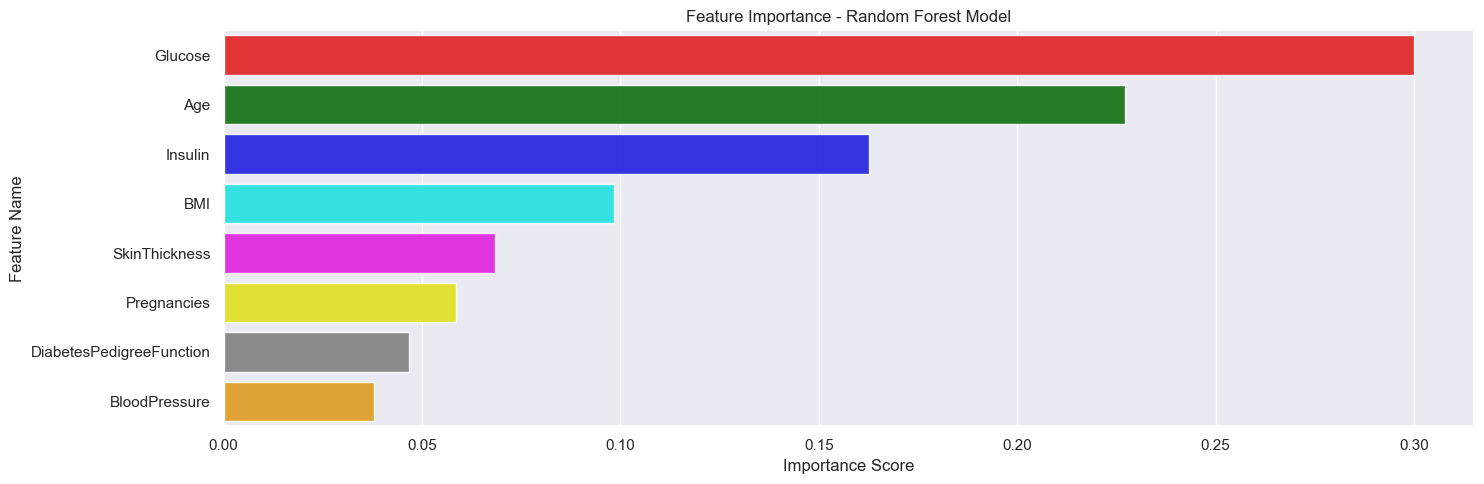

In [56]:
# Get feature importances
feature_importances = rf_model.feature_importances_
features = x_train.columns

# Create a DataFrame for easier plotting
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plotting
plt.figure(figsize=(15, 5))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette=["red", "green", "blue", "cyan", "magenta", "yellow",
     "grey", "orange"],alpha=0.9)
plt.title('Feature Importance - Random Forest Model')
plt.xlabel('Importance Score')
plt.ylabel('Feature Name')
plt.tight_layout()
plt.show()


**Key Observations and Interpretation:**

The graph clearly ranks the features by their contribution to the model's predictive power:

**Glucose (Importance Score ≈0.30):** This is by far the most important feature. This means that glucose levels are the primary determinant for the Random Forest model when making its predictions (e.g., classifying someone as diabetic or not). This aligns with clinical understanding of diabetes.

**Age (Importance Score ≈0.22):** Age is the second most important feature. This indicates that a person's age plays a significant role in predicting the outcome.

**Insulin (Importance Score ≈0.16):** Insulin levels come in third, showing a substantial contribution to the model's decisions.

**BMI (Importance Score ≈0.10):** Body Mass Index is the fourth most important feature, signifying its moderate influence.

**SkinThickness (Importance Score ≈0.07):** Skin thickness contributes to the model's predictions, but to a lesser extent than the top four.

**Pregnancies (Importance Score ≈0.05):** The number of pregnancies has a relatively low importance score.

**DiabetesPedigreeFunction (Importance Score ≈0.04):** This genetic predisposition factor also shows a low importance in this model.

**BloodPressure (Importance Score ≈0.03):** Blood pressure is the least important feature in this Random Forest model.

**In summary,** for this Random Forest model, Glucose and Age are overwhelmingly the most influential factors, followed by Insulin and BMI. Features like SkinThickness, Pregnancies, DiabetesPedigreeFunction, and especially BloodPressure, contribute much less to the model's predictive accuracy. This information is crucial for understanding which factors the model relies on most heavily when making its classifications.

## Model Performance Report
Overall Accuracy

**Accuracy: 95.5%**
the model correctly predicted the outcomes for 64 out of 67 samples.


|              | Predicted 0 | Predicted 1 |
| ------------ | ----------- | ----------- |
| **Actual 0** | 30          | 3           |
| **Actual 1** | 0           | 34          |


True Negatives (TN): 30

False Positives (FP): 3

False Negatives (FN): 0 

True Positives (TP): 34

Zero false negatives! the model correctly identified all high-risk cases — essential for health or safety-related applications.


| Class             | Precision | Recall | F1-score | Support |
| ----------------- | --------- | ------ | -------- | ------- |
| **0** (Low risk)  | 1.00      | 0.91   | 0.95     | 33      |
| **1** (High risk) | 0.92      | 1.00   | 0.96     | 34      |


---
**Precision:**

Class 0: 100% — All predictions of 0 were correct.

Class 1: 92% — A few false positives.

Recall:

Class 0: 91% — Missed 3 cases.

Class 1: 100% — No high-risk cases were missed 

**F1-Score:**
Balanced metric between precision and recall.
Both classes scored around 95–96%, indicating strong and balanced performance.


---
**Summary**
✅ High accuracy: 95.5%

✅ Perfect recall for high-risk cases (Class 1)

✅ No false negatives — ideal for risk prediction tasks

🔍 Only a few false positives for Class 1, which is generally acceptable in many domains

